<a href="https://colab.research.google.com/github/bala-baskar/quants_analyst/blob/main/investing/ITC_stock_CAPM_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Financial analysis of NSE stock (ITC) against NIFTY 50


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [ ]:
sns.set_theme(style='darkgrid')

In [ ]:
# Set the start and end date
start_date = '2021-03-31'
end_date = '2023-04-01'

# Set the ticker
tickers = ['^NSEI','ITC.NS']
stock = 'ITC'

df = pd.DataFrame()
# Get the data
for ticker in tickers:
  data = yf.download(ticker, start_date, end_date)
  data['instrument'] = ticker

  df = df.append(data)

[*********************100%***********************]  1 of 1 completed


<ipython-input-62-6e98a7cb3367>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


[*********************100%***********************]  1 of 1 completed


<ipython-input-62-6e98a7cb3367>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)


In [ ]:
df['instrument'] = df['instrument'].apply(lambda x: 'NIFTY 50' if x == '^NSEI' else stock)
df.tail()

,Open,High,Low,Close,Adj Close,Volume,instrument
Date,,,,,,,
2023-03-24,381.500000,383.000000,378.000000,378.700012,376.381104,9934501,ITC
2023-03-27,377.950012,384.399994,376.350006,380.200012,377.871918,10816352,ITC
2023-03-28,380.200012,382.350006,378.149994,379.750000,377.424652,9170535,ITC
2023-03-29,380.200012,384.000000,377.149994,382.750000,380.406281,10160322,ITC
2023-03-31,382.000000,384.500000,380.000000,383.500000,381.151703,9511189,ITC


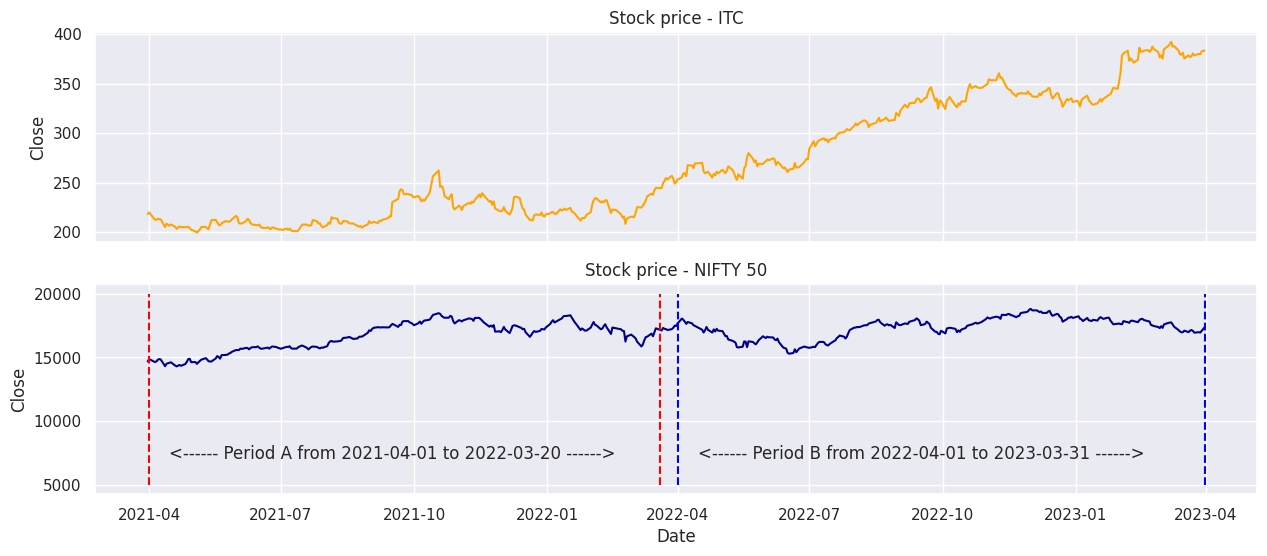

In [ ]:
fig,(ax1,ax2) = plt.subplots(2,1,sharex=True,figsize = (15,6))

sns.lineplot(x=df.loc[df['instrument'] == stock].index,y=df.loc[df['instrument'] == stock]['Close'],ax=ax1,color='orange')
ax1.title.set_text(f"Stock price - {stock}")
sns.lineplot(x=df.loc[df['instrument'] == "NIFTY 50"].index,y=df.loc[df['instrument'] == "NIFTY 50"]['Close'],ax=ax2,color='darkblue')
ax2.title.set_text(f"Stock price - NIFTY 50")
plt.vlines(pd.to_datetime('2021-04-01'),ymin=5000,ymax=20000,colors='red',linestyles='dashed')
plt.vlines(pd.to_datetime('2022-03-20'),ymin=5000,ymax=20000,colors='red',linestyles='dashed')
plt.vlines(pd.to_datetime('2022-04-01'),ymin=5000,ymax=20000,colors='blue',linestyles='dashed')
plt.vlines(pd.to_datetime('2023-03-31'),ymin=5000,ymax=20000,colors='blue',linestyles='dashed')
plt.text(pd.to_datetime('2021-04-15'), 7000, '<------ Period A from 2021-04-01 to 2022-03-20 ------>')
plt.text(pd.to_datetime('2022-04-15'), 7000, '<------ Period B from 2022-04-01 to 2023-03-31 ------>')
plt.show()

In [ ]:
stock_df = df.loc[df["instrument"] == stock]
index_df = df.loc[df["instrument"] == "NIFTY 50"]
stock_df.shape, index_df.shape

((498, 7), (498, 7))

In [ ]:
# Daily returns calculation
stock_df['daily_returns'] = (stock_df['Close'] / stock_df['Close'].shift(1) - 1)*100.0
stock_df.head()

<ipython-input-66-b6edf8aaf996>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df['daily_returns'] = (stock_df['Close'] / stock_df['Close'].shift(1) - 1)*100.0


,Open,High,Low,Close,Adj Close,Volume,instrument,daily_returns
Date,,,,,,,,
2021-03-31,214.050003,219.300003,212.699997,218.500000,198.647964,36485322,ITC,NaN
2021-04-01,220.000000,220.600006,217.300003,220.050003,200.057144,29062762,ITC,0.709384
2021-04-05,217.600006,220.000000,210.500000,212.550003,193.238571,31378045,ITC,-3.408316
2021-04-06,213.800003,214.949997,210.149994,212.649994,193.329483,25674227,ITC,0.047043
2021-04-07,212.699997,215.199997,212.449997,213.800003,194.375000,15204883,ITC,0.540799


In [ ]:
# Daily returns calculation
index_df['daily_returns'] = (index_df['Close'] / index_df['Close'].shift(1) - 1)*100.0
index_df.head()

<ipython-input-67-9e6c57376a62>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  index_df['daily_returns'] = (index_df['Close'] / index_df['Close'].shift(1) - 1)*100.0


,Open,High,Low,Close,Adj Close,Volume,instrument,daily_returns
Date,,,,,,,,
2021-03-31,14811.849609,14813.750000,14670.250000,14690.700195,14690.700195,463900,NIFTY 50,NaN
2021-04-01,14798.400391,14883.200195,14692.450195,14867.349609,14867.349609,445000,NIFTY 50,1.202457
2021-04-05,14837.700195,14849.849609,14459.500000,14637.799805,14637.799805,509700,NIFTY 50,-1.543986
2021-04-06,14737.000000,14779.099609,14573.900391,14683.500000,14683.500000,475300,NIFTY 50,0.312207
2021-04-07,14716.450195,14879.799805,14649.849609,14819.049805,14819.049805,0,NIFTY 50,0.923144


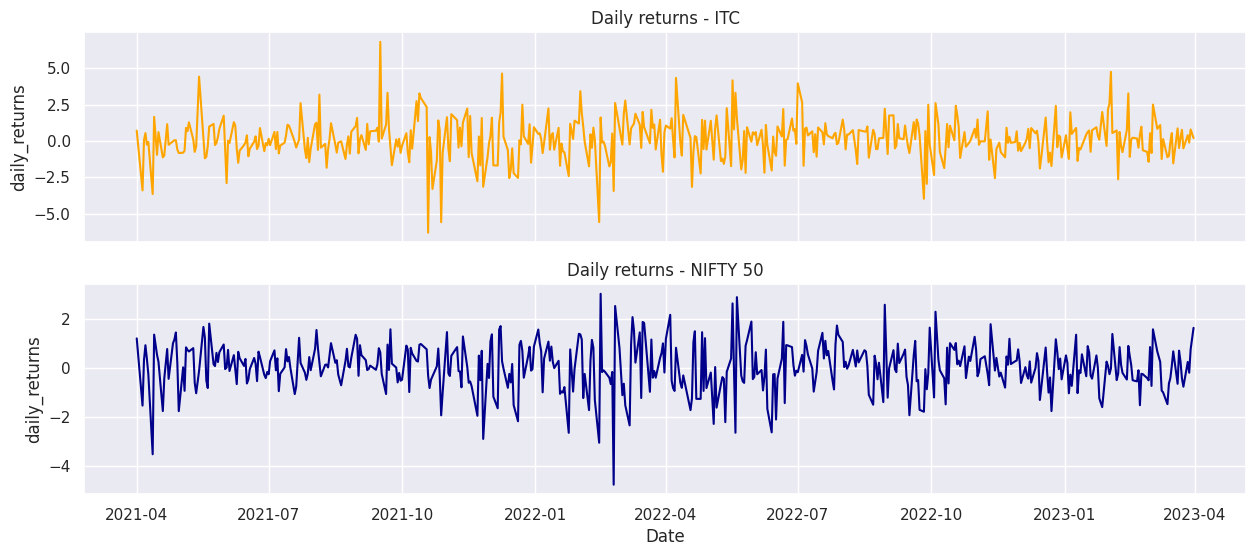

In [ ]:
fig,(ax1,ax2) = plt.subplots(2,1,sharex=True,figsize = (15,6))

sns.lineplot(x=stock_df.index,y=stock_df['daily_returns'],ax=ax1,color='orange')
ax1.title.set_text(f"Daily returns - {stock}")
sns.lineplot(x=index_df.index,y=index_df['daily_returns'],ax=ax2,color='darkblue')
ax2.title.set_text(f"Daily returns - NIFTY 50")
plt.show()

In [ ]:
beta_df = stock_df[['Close','daily_returns']].merge(index_df[['Close','daily_returns']],right_index=True,left_index=True)
beta_df.rename(columns={'Close_x':"price_stock",'daily_returns_x':"daily_returns_stock",
                        'Close_y':"price_index",'daily_returns_y':"daily_returns_index"},inplace=True)
beta_df = beta_df.dropna()
beta_df.head()

,price_stock,daily_returns_stock,price_index,daily_returns_index
Date,,,,
2021-04-01,220.050003,0.709384,14867.349609,1.202457
2021-04-05,212.550003,-3.408316,14637.799805,-1.543986
2021-04-06,212.649994,0.047043,14683.500000,0.312207
2021-04-07,213.800003,0.540799,14819.049805,0.923144
2021-04-08,213.250000,-0.257251,14873.799805,0.369457


In [ ]:
beta_df['period'] = None
beta_df.loc['2021-04-01':'2022-03-20','period'] = 'period A'
beta_df.loc['2022-04-01':'2023-03-31','period'] = 'period B'
beta_df.head()

,price_stock,daily_returns_stock,price_index,daily_returns_index,period
Date,,,,,
2021-04-01,220.050003,0.709384,14867.349609,1.202457,period A
2021-04-05,212.550003,-3.408316,14637.799805,-1.543986,period A
2021-04-06,212.649994,0.047043,14683.500000,0.312207,period A
2021-04-07,213.800003,0.540799,14819.049805,0.923144,period A
2021-04-08,213.250000,-0.257251,14873.799805,0.369457,period A


In [ ]:
beta_df['period'].value_counts()

period B    249
period A    239
Name: period, dtype: int64

In [ ]:
def beta(X):

  return (np.cov(X['daily_returns_stock'],X['daily_returns_index'])[0][1] / np.var(X['daily_returns_index']))

In [ ]:
beta_df.groupby('period').apply(lambda x: beta(x))

period
period A    0.875642
period B    0.551791
dtype: float64

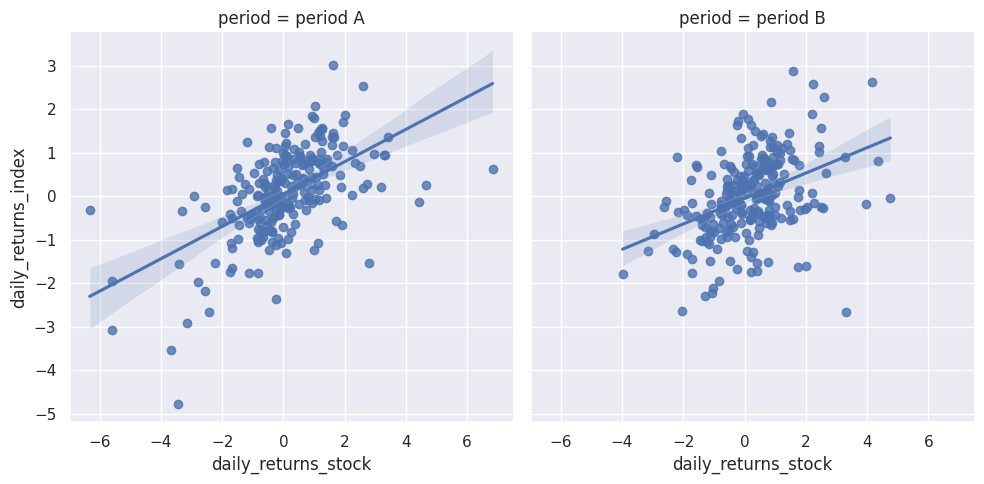

In [ ]:
sns.lmplot(data = beta_df, x='daily_returns_stock',y='daily_returns_index',col='period')

In [ ]:
beta_df.groupby('period').apply(lambda x:pd.crosstab(x['daily_returns_stock'] > 0, x['daily_returns_index'] > 0))

daily_returns_index           False  True 
period   daily_returns_stock              
period A False                   81     41
         True                    25     92
period B False                   73     35
         True                    56     85

In [ ]:
beta_df.groupby('period')[['daily_returns_stock','daily_returns_index']].describe().T

period                       period A    period B
daily_returns_stock count  239.000000  249.000000
                    mean     0.059602    0.178996
                    std      1.542102    1.274222
                    min     -6.322602   -3.983830
                    25%     -0.621304   -0.569797
                    50%     -0.044896    0.204051
                    75%      0.915243    0.831272
                    max      6.828704    4.759273
daily_returns_index count  239.000000  249.000000
                    mean     0.073194    0.001877
                    std      1.007121    0.929168
                    min     -4.778104   -2.653273
                    25%     -0.428998   -0.510272
                    50%      0.134391   -0.035371
                    75%      0.759169    0.653365
                    max      3.025913    2.889104

### Capital Asset pricing model (CAPM)

Taking the 10 year Indian government bond yield prevailing around April/May 2021 as the risk-free rate, compute the required return on the stock using the CAPM by making an appropriate assumption regarding the market risk premium (see your textbook for hints on this)


CAPM, Expected Return (ERe) = Rf + β * (ERm - Rf)

Where:
ERe = Expected return on the stock  
Rf = Risk-free rate  
β = Beta of the stock  
ERm = Expected return of the market

Market Risk Premium (ERm - Rf) = Expected Market Return - Risk-Free Rate

From this [RBI source](https://www.rbi.org.in/Scripts/BS_NSDPDisplay.aspx?param=4) the 10 year Indian Gov bond yield around 2021-04-02 is 6.34%

In [ ]:
# Based on data for last 2 years since 2021-04-01
risk_free_rate = 0.0634
expected_market_return = beta_df['daily_returns_index'].mean()
beta_val = beta(beta_df)

print(f"Beta of the stock - {beta_val}")
print(f"Expected market return - {round(expected_market_return * 100.0,2)} %")

expected_stock_return = risk_free_rate + beta_val * (expected_market_return - risk_free_rate)
print(f"Expected return of the stock - {round(expected_stock_return *100.0,2)} %")

Beta of the stock - 0.7121277166531929
Expected market return - 3.82 %
Expected return of the stock - 4.55 %


In [ ]:
# Based on data for last 1 year since 2022-04-01
risk_free_rate = 0.0634
expected_market_return = beta_df['2022-01-01':]['daily_returns_index'].mean()
beta_val = beta(beta_df['2022-01-01':])

print(f"Beta of the stock - {beta_val}")
print(f"Expected market return - {round(expected_market_return * 100.0,2)} %")

expected_stock_return = risk_free_rate + beta_val * (expected_market_return - risk_free_rate)
print(f"Expected return of the stock - {round(expected_stock_return *100.0,2)} %")

Beta of the stock - 0.6102427186066665
Expected market return - 0.54 %
Expected return of the stock - 2.8 %


### Cost of debt

Estimate the cost of debt by two methods:

o    using the data in the financial statements based on actual information about its borrowing

o    assessing the company’s creditworthiness and estimating the cost of debt for similar companies - this will require some internet search. You'll need to figure the approximate credit rating of bonds of company of your choice, get a reasonable sense of the credit spread (c.f. the Du Pont 1983). This may require visiting the websites of Indian credit rating firms.

As a financial analyst, you can calculate the cost of debt for a company using its financial statements. The cost of debt represents the interest rate a company pays on its debt, and it's an essential component in calculating a company's weighted average cost of capital (WACC). Here's how you can calculate the cost of debt:

Step 1: Gather Information
You'll need the following information from the company's financial statements:
1. Total Debt: The total amount of debt the company has, including both short-term and long-term debt. You can find this information on the company's balance sheet.
2. Interest Expense: The interest expense the company paid during a specific period (usually a year). You can find this information in the company's income statement.

Step 2: Calculate the Cost of Debt
To calculate the cost of debt, you can use the formula for the yield to maturity (YTM) on the company's debt. The YTM represents the effective interest rate the company is paying on its debt, taking into account the current market price of the debt and the remaining time to maturity. However, since you may not have all the necessary information for a precise YTM calculation, you can use a simplified approach:

Cost of Debt = (Interest Expense / Total Debt)

This formula assumes that the interest expense represents the total interest paid by the company on all its debt during the period. It also assumes that the total debt remains relatively constant during the period, so it's essential to consider this when using the formula.

Step 3: Adjust for Tax Deductibility
In most cases, the interest expense is tax-deductible, which means the company can save on taxes due to the interest payments. To calculate the after-tax cost of debt (which is often more relevant for WACC calculations), you can use the formula:

After-Tax Cost of Debt = Cost of Debt * (1 - Tax Rate)

The tax rate used should be the effective tax rate, which you can find in the company's income statement or footnotes.

Please note that the cost of debt is just one component of a company's overall cost of capital (WACC), which also includes the cost of equity and sometimes the cost of preferred stock. Additionally, when using financial statements to calculate financial metrics, it's crucial to ensure the accuracy of the data and consider any extraordinary items that may affect the results. If possible, consult with the company's financial team or an accounting expert for a more precise analysis.

## Weighted average cost of capital
·         Examine the evolution of the debt equity ratio over the last several years (from at least the last 5 years' annual reports) and form your judgement of the target capital structure.

·         Based on all of the above, estimate the weighted average cost of capital (WACC) for the chosen company

Calculating the weighted average cost of capital (WACC) involves taking into account the proportion of each component of a company's capital structure (debt, equity, preferred stock) and its respective cost. The WACC represents the average cost of financing a company's operations, considering both its debt and equity sources. Here's how to calculate WACC:

Step 1: Gather Information
You'll need the following information:
1. Cost of Equity (Ke): The expected rate of return demanded by the company's equity investors. This can be calculated using the Capital Asset Pricing Model (CAPM) or other equity valuation methods.
2. Cost of Debt (Kd): The cost of debt, which we calculated in the previous response. If you have an after-tax cost of debt, use that value.
3. Equity Weight (We): The proportion of equity in the company's capital structure, typically represented as a percentage. It can be calculated by dividing the market value of equity by the total market value of the firm's debt and equity.
4. Debt Weight (Wd): The proportion of debt in the company's capital structure, also represented as a percentage. It can be calculated by dividing the market value of debt by the total market value of the firm's debt and equity.
5. Tax Rate (Tc): The effective corporate tax rate. You can find this information in the company's income statement or footnotes.

Step 2: Calculate WACC
The formula for WACC is as follows:

WACC = (We * Ke) + (Wd * Kd * (1 - Tc))

Where:
We = Equity Weight
Ke = Cost of Equity
Wd = Debt Weight
Kd = Cost of Debt (after-tax)
Tc = Tax Rate

Plug in the values into the formula and calculate WACC.

Step 3: Interpretation
The WACC represents the average rate of return that a company needs to generate to meet its obligations to both debt and equity investors. It is used as a discount rate for evaluating potential investment projects. If a new project's expected rate of return is higher than the WACC, it may be considered a good investment. Conversely, if the project's expected return is lower than the WACC, it may not be a favorable investment.

Keep in mind that the WACC is a theoretical model and should be used in conjunction with other financial analysis techniques when making investment decisions. Additionally, the values used in the calculation may change over time, so it's essential to update the WACC periodically to reflect changes in the company's capital structure and cost of capital.